# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data



## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

#### User generated Hypothesis

1. loan to income ratio
2. loan to income ratio for approved longer term loans
3. use combined income versus loan_status
4. combine income vs (loan value/term)
5. loan value normalised avg in the property area

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
total_nulls = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulls, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [4]:
total_zeros = (df == 0).sum().sort_values(ascending=False)
percent = (df == 0).sum()*100/(df == 0).count().sort_values(ascending=False)
zero_count = pd.concat([total_zeros, percent], axis=1, keys=['Total', 'Percent'])
zero_count.head(13)

,Total,Percent
CoapplicantIncome,273,44.462541
Credit_History,89,14.495114
Loan_ID,0,0.000000
Gender,0,0.000000
Married,0,0.000000
Dependents,0,0.000000
Education,0,0.000000
Self_Employed,0,0.000000
ApplicantIncome,0,0.000000
LoanAmount,0,0.000000


Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)

In [6]:
# Credit history count
print(df['Credit_History'].sum())
print(df['Credit_History'].sum()/len(df))

475.0
0.7736156351791531


2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?

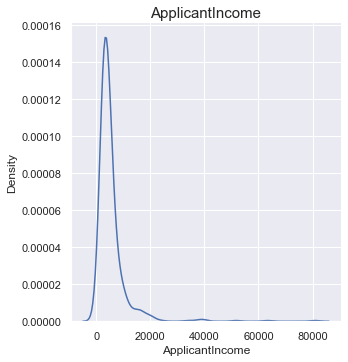

In [7]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='ApplicantIncome',kind='kde')
plt.title("ApplicantIncome", size=15)
plt.show()

Applicant income vs loan amount

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

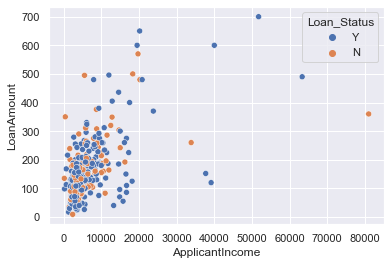

In [8]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

Assumption that anyone over 30K a month has mis reported their income as annual instead of monthly. Unlikely I need a loan for 100K if I make 360k a year. Values over 30k will be divided by 12.


In [9]:
condition = df['ApplicantIncome'] < 30000
monthly = df['ApplicantIncome'] / 12
df['ApplicantIncome'] = df['ApplicantIncome'].where(condition, monthly)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

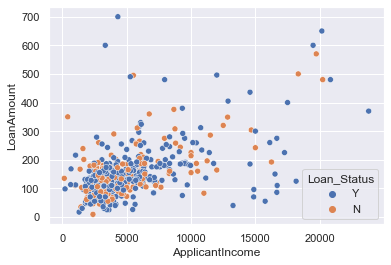

In [10]:
sns.scatterplot(data=df, x="ApplicantIncome", y="LoanAmount", hue="Loan_Status")

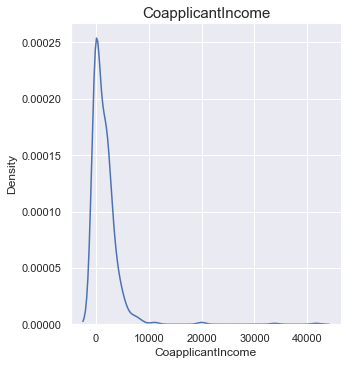

In [11]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='CoapplicantIncome',kind='kde')
plt.title("CoapplicantIncome", size=15)
plt.show()

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

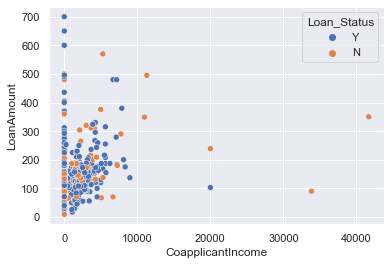

In [12]:
sns.scatterplot(data=df, x="CoapplicantIncome", y="LoanAmount", hue="Loan_Status")

Same rational applied to coapplicant income for monthly versus yearly

In [13]:
condition = df['CoapplicantIncome'] < 30000
monthly = df['CoapplicantIncome'] / 12
df['CoapplicantIncome'] = df['CoapplicantIncome'].where(condition, monthly)

Combined Income

In [14]:
df['combined_income'] = df['CoapplicantIncome'] + df['ApplicantIncome']

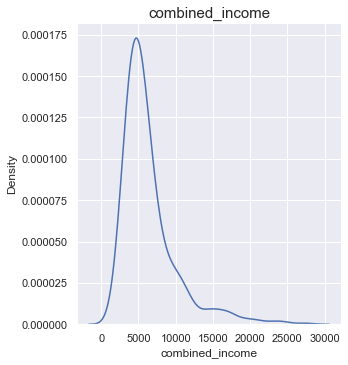

In [15]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='combined_income',kind='kde')
plt.title("combined_income", size=15)
plt.show()

<AxesSubplot:xlabel='combined_income', ylabel='LoanAmount'>

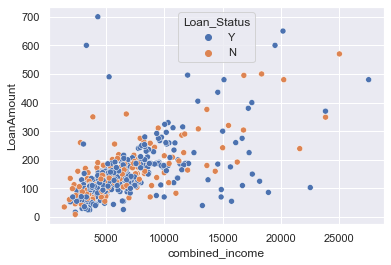

In [16]:
sns.scatterplot(data=df, x="combined_income", y="LoanAmount", hue="Loan_Status")

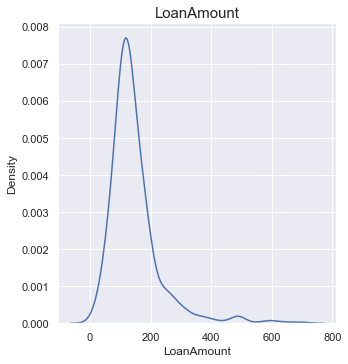

In [17]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='LoanAmount',kind='kde')
plt.title("LoanAmount", size=15)
plt.show()

3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature?
    Income and loan amount is skewed to the right as would be expected. 

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [18]:
df['Credit_History'] = df['Credit_History'].astype('object')


In [19]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
combined_income      554
dtype: int64

In [20]:
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']].nunique()

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
Loan_Status       2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

<AxesSubplot:xlabel='Gender', ylabel='Probability'>

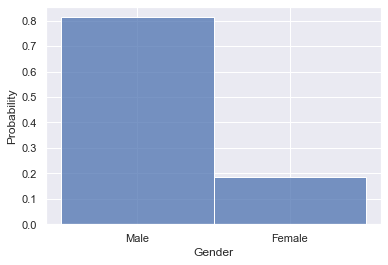

In [21]:
categoricals = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

sns.histplot(data = df, x='Gender', stat='probability')

<AxesSubplot:xlabel='Married', ylabel='Probability'>

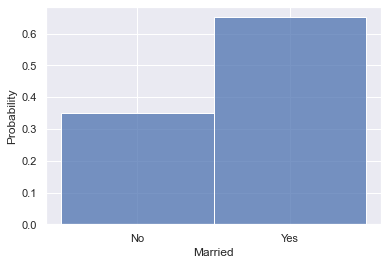

In [22]:
sns.histplot(data = df, x='Married', stat='probability')

<AxesSubplot:xlabel='Dependents', ylabel='Probability'>

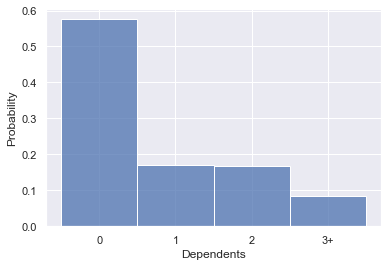

In [23]:
sns.histplot(data = df, x='Dependents', stat='probability')

<AxesSubplot:xlabel='Education', ylabel='Probability'>

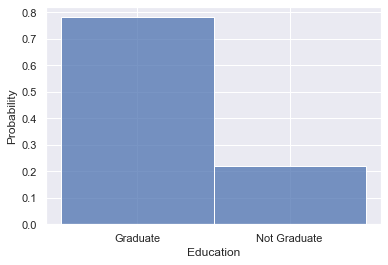

In [24]:
sns.histplot(data = df, x='Education', stat='probability')

<AxesSubplot:xlabel='Self_Employed', ylabel='Probability'>

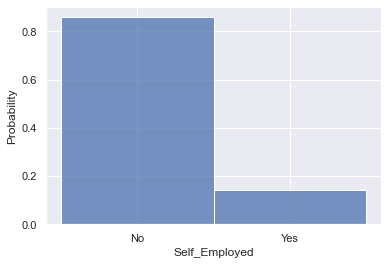

In [25]:
sns.histplot(data = df, x='Self_Employed', stat='probability')

<AxesSubplot:xlabel='Credit_History', ylabel='Probability'>

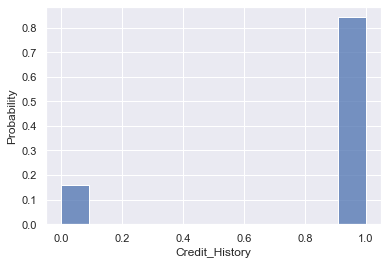

In [26]:
sns.histplot(data = df, x='Credit_History', stat='probability')

<AxesSubplot:xlabel='Property_Area', ylabel='Probability'>

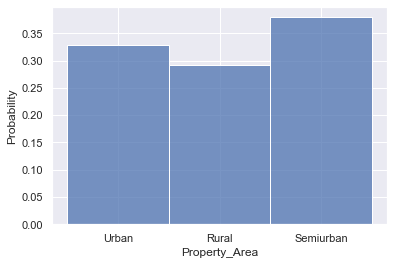

In [27]:
sns.histplot(data = df, x='Property_Area', stat='probability')

sns.histplot(data = df, x='Gender', stat='probability')

<AxesSubplot:xlabel='Loan_Status', ylabel='Probability'>

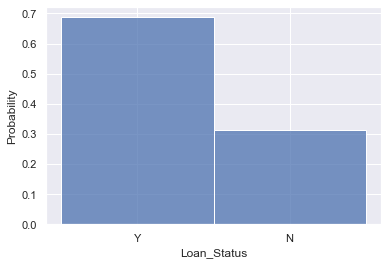

In [28]:
sns.histplot(data = df, x='Loan_Status', stat='probability')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Probability'>

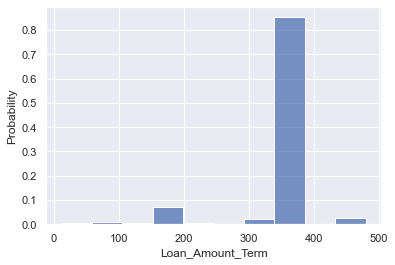

In [29]:
sns.histplot(data = df, x='Loan_Amount_Term', stat='probability', bins =10)

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



See above


Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='combined_income'>

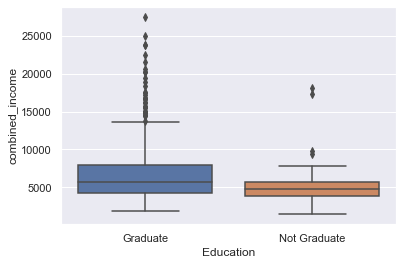

In [30]:
sns.boxplot(data=df, x='Education', y='combined_income')

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:ylabel='LoanAmount'>

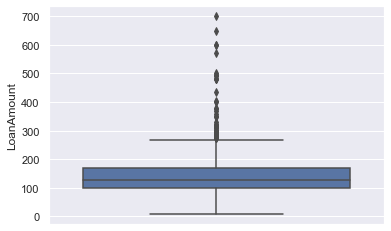

In [31]:
sns.boxplot(data=df, y='LoanAmount')

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

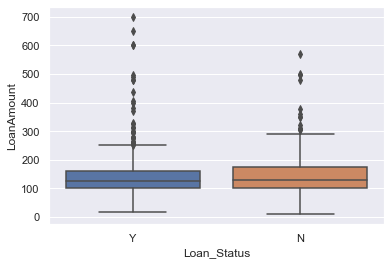

In [32]:
sns.boxplot(data=df, x='Loan_Status', y='LoanAmount')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

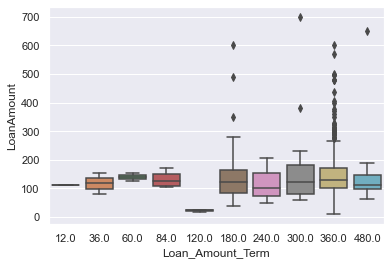

In [33]:
sns.boxplot(data=df, x = 'Loan_Amount_Term', y='LoanAmount')

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

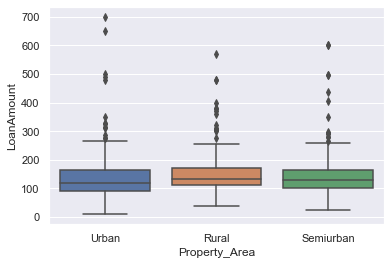

In [34]:
sns.boxplot(data=df, x = 'Property_Area', y='LoanAmount')

### Add additional Features

In [35]:
#### loan_amount/month

df['amt_per_month'] = (df['LoanAmount']*1000) / df['Loan_Amount_Term']

In [36]:
df['loan_to_income_ratio'] = df['amt_per_month']/df['combined_income']

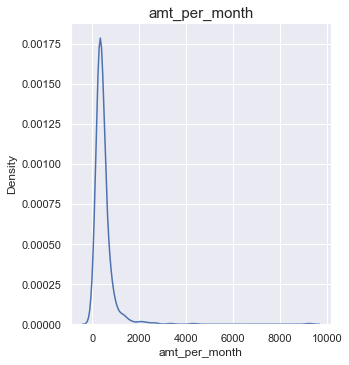

In [37]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='amt_per_month',kind='kde')
plt.title('amt_per_month', size=15)
plt.show()

Combined income created earlier in the workbook

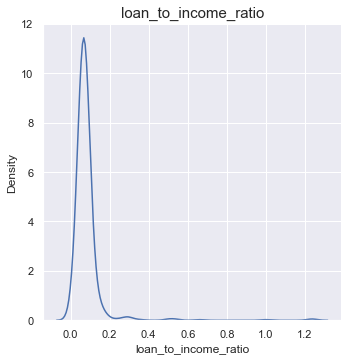

In [38]:
sns.set_theme(style="darkgrid")
sns.displot(df, x='loan_to_income_ratio',kind='kde')
plt.title('loan_to_income_ratio', size=15)
plt.show()

<AxesSubplot:xlabel='loan_to_income_ratio', ylabel='LoanAmount'>

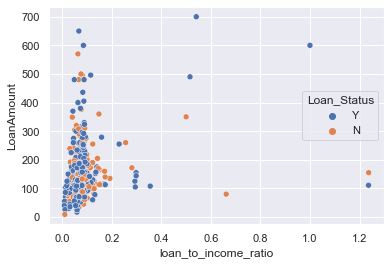

In [39]:
sns.scatterplot(data=df, x="loan_to_income_ratio", y="LoanAmount", hue="Loan_Status")

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [40]:
# Not required

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [41]:
missing_data.head(13)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Replacing with Mode

In [42]:
for column in ['Married', 'Gender', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode()[0], inplace=True)

Replace missing credit hist values with backfill. Missing Values accounted for 8% seemed too high to delete. 

In [43]:
df['Credit_History'].fillna(method="ffill", inplace=True)

drop missing values for Loan Amount and Term

In [44]:
df = df.dropna()

In [45]:
total_nulls = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_nulls, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [46]:
df["LoanAmount_log"] = df["LoanAmount"].apply(np.log)

Combine both incomes as total income and take a log transformation of the same.

In [47]:
df["combined_income_log"] = df["combined_income"].apply(np.log)

In [48]:
df["loan_to_income_ratio_log"] = df["loan_to_income_ratio"].apply(np.log)

In [49]:
Q1 = df['combined_income_log'].quantile(0.25)
Q3 = df['combined_income_log'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

n_outliers = ((df['combined_income_log'] < (Q1 - 1.5 * IQR)) | (df['combined_income_log'] > (Q3 + 1.5 * IQR))).sum()
pct_outliers = (n_outliers/len(df['combined_income_log']))*100
print(n_outliers)
print(pct_outliers)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)


df.drop(df[(df['combined_income_log'] < lower_limit)].index, inplace=True)
df.drop(df[(df['combined_income_log'] > upper_limit)].index, inplace=True)

8.325123837480572
8.892748315817595
0.5676244783370237
17
2.941176470588235
7.473687119975036
9.74418503332313


In [50]:
Q1 = df['LoanAmount_log'].quantile(0.25)
Q3 = df['LoanAmount_log'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

n_outliers = ((df['LoanAmount_log'] < (Q1 - 1.5 * IQR)) | (df['LoanAmount_log'] > (Q3 + 1.5 * IQR))).sum()
pct_outliers = (n_outliers/len(df['LoanAmount_log']))*100
print(n_outliers)
print(pct_outliers)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

df.drop(df[(df['LoanAmount_log'] < lower_limit)].index, inplace=True)
df.drop(df[(df['LoanAmount_log'] > upper_limit)].index, inplace=True)

4.605170185988092
5.099866427824199
0.49469624183610694
28
4.991087344028521
3.8631258232339314
5.841910790578359


In [51]:
Q1 = df['loan_to_income_ratio_log'].quantile(0.25)
Q3 = df['loan_to_income_ratio_log'].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)
print(IQR)

n_outliers = ((df['loan_to_income_ratio_log'] < (Q1 - 1.5 * IQR)) | (df['loan_to_income_ratio_log'] > (Q3 + 1.5 * IQR))).sum()
pct_outliers = (n_outliers/len(df['loan_to_income_ratio_log']))*100
print(n_outliers)
print(pct_outliers)

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

df.drop(df[(df['loan_to_income_ratio_log'] < lower_limit)].index, inplace=True)
df.drop(df[(df['loan_to_income_ratio_log'] > upper_limit)].index, inplace=True)

-2.8556861999082748
-2.4989201499582103
0.35676604995006445
38
7.129455909943714
-3.390835274833371
-1.9637710750331137


<AxesSubplot:xlabel='combined_income_log', ylabel='LoanAmount_log'>

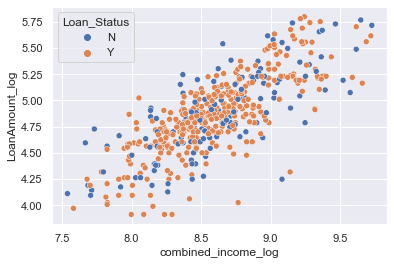

In [52]:
sns.scatterplot(data=df, x="combined_income_log", y="LoanAmount_log", hue="Loan_Status")

<AxesSubplot:xlabel='loan_to_income_ratio_log', ylabel='LoanAmount_log'>

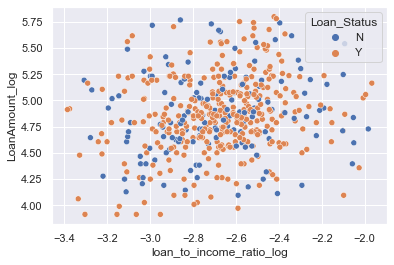

In [53]:
sns.scatterplot(data=df, x="loan_to_income_ratio_log", y="LoanAmount_log", hue="Loan_Status")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   495 non-null    object 
 1   Gender                    495 non-null    object 
 2   Married                   495 non-null    object 
 3   Dependents                495 non-null    object 
 4   Education                 495 non-null    object 
 5   Self_Employed             495 non-null    object 
 6   ApplicantIncome           495 non-null    float64
 7   CoapplicantIncome         495 non-null    float64
 8   LoanAmount                495 non-null    float64
 9   Loan_Amount_Term          495 non-null    float64
 10  Credit_History            495 non-null    float64
 11  Property_Area             495 non-null    object 
 12  Loan_Status               495 non-null    object 
 13  combined_income           495 non-null    float64
 14  amt_per_mo

In [55]:
df.nunique()

Loan_ID                     495
Gender                        2
Married                       2
Dependents                    4
Education                     2
Self_Employed                 2
ApplicantIncome             407
CoapplicantIncome           243
LoanAmount                  166
Loan_Amount_Term              5
Credit_History                2
Property_Area                 3
Loan_Status                   2
combined_income             447
amt_per_month               190
loan_to_income_ratio        492
LoanAmount_log              166
combined_income_log         447
loan_to_income_ratio_log    490
dtype: int64

In [56]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('object')
df['Credit_History'] = df['Credit_History'].astype('object')
# convert cats to one hot encoding
dummies = ['Property_Area', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Education', 'Self_Employed', 'Credit_History', 'Married', 'Loan_Status']
df_dummies = pd.get_dummies(df[dummies])
df = pd.concat([df, df_dummies], axis=1)
df.head(3)

/Users/simonj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Married_No,Married_Yes,Loan_Status_N,Loan_Status_Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,...,1,0,1,0,0,1,0,1,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,...,1,0,0,1,0,1,0,1,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,...,0,1,1,0,0,1,0,1,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Loan_ID                   495 non-null    object 
 1   Gender                    495 non-null    object 
 2   Married                   495 non-null    object 
 3   Dependents                495 non-null    object 
 4   Education                 495 non-null    object 
 5   Self_Employed             495 non-null    object 
 6   ApplicantIncome           495 non-null    float64
 7   CoapplicantIncome         495 non-null    float64
 8   LoanAmount                495 non-null    float64
 9   Loan_Amount_Term          495 non-null    object 
 10  Credit_History            495 non-null    object 
 11  Property_Area             495 non-null    object 
 12  Loan_Status               495 non-null    object 
 13  combined_income           495 non-null    float64
 14  amt_per_mo

drop redunant columns

In [58]:
model_df = df.drop(['Married_No', 'Credit_History_0.0', 'Self_Employed_No', 'Education_Not Graduate',
                    'Gender_Female', 'Property_Area', 'Credit_History', 'Loan_Amount_Term',
                    'CoapplicantIncome', 'ApplicantIncome', 'Self_Employed', 'Education',
                    'Dependents', 'Married', 'Gender', 'Loan_ID', 'Loan_Status', 'Loan_Status_N',
                    'Loan_Amount_Term_240.0', 'LoanAmount', 'combined_income', 'loan_to_income_ratio'], axis=1)
                    
                    

In [59]:
#model_df = df.drop(['Married_No', 'Credit_History_0.0', 'Self_Employed_No', 'Education_Not Graduate',
 #                   'Gender_Female', 'Property_Area', 'Credit_History', 'Loan_Amount_Term', 'CoapplicantIncome', 'ApplicantIncome',
  #                  'Self_Employed', 'Education', 'Dependents', 'Married', 'Gender', 'Loan_ID', 'Loan_Status', 'Loan_Status_N', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0', 'Loan_Amount_Term_240.0'], axis=1)

In [60]:
model_df.shape

(495, 21)

In [61]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amt_per_month             495 non-null    float64
 1   LoanAmount_log            495 non-null    float64
 2   combined_income_log       495 non-null    float64
 3   loan_to_income_ratio_log  495 non-null    float64
 4   Property_Area_Rural       495 non-null    uint8  
 5   Property_Area_Semiurban   495 non-null    uint8  
 6   Property_Area_Urban       495 non-null    uint8  
 7   Dependents_0              495 non-null    uint8  
 8   Dependents_1              495 non-null    uint8  
 9   Dependents_2              495 non-null    uint8  
 10  Dependents_3+             495 non-null    uint8  
 11  Loan_Amount_Term_180.0    495 non-null    uint8  
 12  Loan_Amount_Term_300.0    495 non-null    uint8  
 13  Loan_Amount_Term_360.0    495 non-null    uint8  
 14  Loan_Amoun

In [62]:
# create train and test sets
X = model_df.drop(['Loan_Status_Y'], axis=1)
y = model_df['Loan_Status_Y']

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Building a Predictive Model

In [64]:
# Initialize different Classification Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

cl1 = RandomForestClassifier(random_state=42)
cl2 = SVC(probability=True, random_state=42)
cl3 = KNeighborsClassifier()
cl4 = LogisticRegression(random_state=42)
cl5 = GradientBoostingClassifier(random_state=42)
ft1 = PCA()
ft2 = SelectKBest()

In [65]:
# Initiaze the hyperparameters for each dictionary

param1 = {}
param1['classifier__n_estimators'] = [2, 5, 10, 15, 50]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier'] = [cl1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
#param2['classifier__kernal'] = ['rbf', 'linear']
param2['classifier'] = [cl2]

param3 = {}
param3['classifier__n_neighbors'] = [2,5,10,25,50]
param3['classifier'] = [cl3]

param4 = {}
param4['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param4['classifier__penalty'] = ['l1', 'l2']
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier__max_iter'] = [250]
param4['classifier'] = [cl4]

param5 = {}
param5['classifier__n_estimators'] = [2, 5, 10, 50, 100, 250]
param5['classifier__max_depth'] = [5, 10, 20]
param5['classifier'] = [cl5]

param6 = {}
param6['features__pca__n_components'] = [2, 5, 8, 11, 14, 17]
param6['features'] = [ft1]

param7 = {}
param7['features__select_best__k'] = [1, 3, 6]
param7['features'] = [ft2]


No PCA or Select K Best

In [66]:
#no feature union
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

classifiers = [cl1, cl2, cl3]

#params = [param1, param2, param3, param5]
params = [param1, param2, param3, param5]

#feature_union = FeatureUnion([('pca', PCA()),
                              #('select_best', SelectKBest())])

pipeline = Pipeline(steps = [('scaling', StandardScaler()),
                             ('classifier', 'passthrough')])

grid = GridSearchCV(pipeline, param_grid = params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.797979797979798
Achieved with hyperparameters:
	 {'classifier': SVC(C=1, probability=True, random_state=42), 'classifier__C': 1}


In [67]:
df = pd.DataFrame(grid.cv_results_['params'])
df['mean_test_score'] = grid.cv_results_['mean_test_score']
df['rank_test_score'] = grid.cv_results_['rank_test_score']
df = df.sort_values(by='rank_test_score', ascending = True)
df.head(5) 

,classifier,classifier__max_depth,classifier__n_estimators,classifier__C,classifier__n_neighbors,mean_test_score,rank_test_score
17,"SVC(C=1, probability=True, random_state=42)",NaN,NaN,1.0,NaN,0.805728,1
4,RandomForestClassifier(random_state=42),5.0,50.0,NaN,NaN,0.800665,2
14,RandomForestClassifier(random_state=42),20.0,50.0,NaN,NaN,0.798070,3
1,RandomForestClassifier(random_state=42),5.0,5.0,NaN,NaN,0.793038,4
9,RandomForestClassifier(random_state=42),10.0,50.0,NaN,NaN,0.790506,5


<AxesSubplot:>

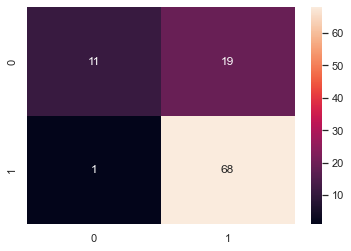

In [68]:
from sklearn.metrics import confusion_matrix
y_preds = grid.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Best model with PCA and kBest

In [69]:
feature_union = FeatureUnion([('pca', PCA()),
                              ('select_best', SelectKBest())])

pipeline = Pipeline(steps = [('scaling', StandardScaler()),
                             ('features', feature_union),
                             ('classifier', 'passthrough')])

param_grid = {'classifier': [RandomForestClassifier(n_estimators=2, max_depth=5, random_state=42), GradientBoostingClassifier(max_depth=5, n_estimators=5), SVC(C=1.0, probability = True, random_state=42)], 
              'features__pca__n_components' : [2, 5, 8, 11, 14, 17], 
             'features__select_best__k' : [1, 3, 6, 9, 12, 14, 16]}

grid = GridSearchCV(pipeline, param_grid = param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.8282828282828283
Achieved with hyperparameters:
	 {'classifier': SVC(probability=True, random_state=42), 'features__pca__n_components': 2, 'features__select_best__k': 1}


Best model with select best

In [70]:
df = pd.DataFrame(grid.cv_results_['params'])
df['mean_test_score'] = grid.cv_results_['mean_test_score']
df['rank_test_score'] = grid.cv_results_['rank_test_score']
df = df.sort_values(by='rank_test_score', ascending = True)
df.head(5) 

,classifier,features__pca__n_components,features__select_best__k,mean_test_score,rank_test_score
84,"SVC(probability=True, random_state=42)",2,1,0.813323,1
88,"SVC(probability=True, random_state=42)",2,12,0.813291,2
93,"SVC(probability=True, random_state=42)",5,6,0.813291,2
91,"SVC(probability=True, random_state=42)",5,1,0.810823,4
96,"SVC(probability=True, random_state=42)",5,14,0.810759,5


<AxesSubplot:>

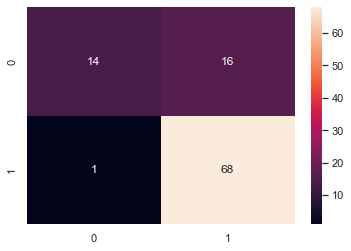

In [71]:
from sklearn.metrics import confusion_matrix
y_preds = grid.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

Repeat with K Best

In [72]:
feature_union = FeatureUnion([
                              ('select_best', SelectKBest())])

pipeline = Pipeline(steps = [('scaling', StandardScaler()),
                             ('features', feature_union),
                             ('classifier', 'passthrough')])

param_grid = {'classifier': [RandomForestClassifier(n_estimators=2, max_depth=5, random_state=42), GradientBoostingClassifier(max_depth=5, n_estimators=5), SVC(C=1.0, probability = True, random_state=42)], 
             'features__select_best__k' : [1, 3, 6, 9, 12, 14, 16]}

grid = GridSearchCV(pipeline, param_grid = param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model_1 = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.8383838383838383
Achieved with hyperparameters:
	 {'classifier': SVC(probability=True, random_state=42), 'features__select_best__k': 3}


Best model with PCA and select best

In [73]:
df = pd.DataFrame(grid.cv_results_['params'])
df['mean_test_score'] = grid.cv_results_['mean_test_score']
df['rank_test_score'] = grid.cv_results_['rank_test_score']
df = df.sort_values(by='rank_test_score', ascending = True)
df.head(5) 

,classifier,features__select_best__k,mean_test_score,rank_test_score
15,"SVC(probability=True, random_state=42)",3,0.820918,1
0,"RandomForestClassifier(max_depth=5, n_estimato...",1,0.815854,2
1,"RandomForestClassifier(max_depth=5, n_estimato...",3,0.815854,2
14,"SVC(probability=True, random_state=42)",1,0.815854,2
7,"GradientBoostingClassifier(max_depth=5, n_esti...",1,0.815854,2


<AxesSubplot:>

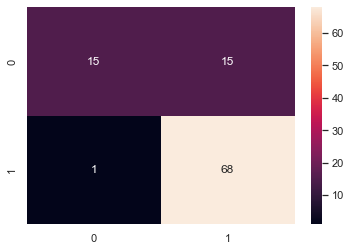

In [74]:
from sklearn.metrics import confusion_matrix
y_preds = grid.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

With PCA

In [75]:
feature_union = FeatureUnion([('pca', PCA())])

pipeline = Pipeline(steps = [('scaling', StandardScaler()),
                             ('features', feature_union),
                             ('classifier', 'passthrough')])

param_grid = {'classifier': [RandomForestClassifier(n_estimators=2, max_depth=5, random_state=42), GradientBoostingClassifier(max_depth=5, n_estimators=5), SVC(C=1.0, probability = True, random_state=42)], 
              'features__pca__n_components' : [2, 5, 8, 11, 14, 17]}

grid = GridSearchCV(pipeline, param_grid = param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.797979797979798
Achieved with hyperparameters:
	 {'classifier': SVC(probability=True, random_state=42), 'features__pca__n_components': 14}


In [76]:
df = pd.DataFrame(grid.cv_results_['params'])
df['mean_test_score'] = grid.cv_results_['mean_test_score']
df['rank_test_score'] = grid.cv_results_['rank_test_score']
df = df.sort_values(by='rank_test_score', ascending = True)
df.head(5) 

,classifier,features__pca__n_components,mean_test_score,rank_test_score
17,"SVC(probability=True, random_state=42)",17,0.805728,1
16,"SVC(probability=True, random_state=42)",14,0.805728,1
15,"SVC(probability=True, random_state=42)",11,0.795633,3
10,"GradientBoostingClassifier(max_depth=5, n_esti...",14,0.780380,4
9,"GradientBoostingClassifier(max_depth=5, n_esti...",11,0.777848,5


<AxesSubplot:>

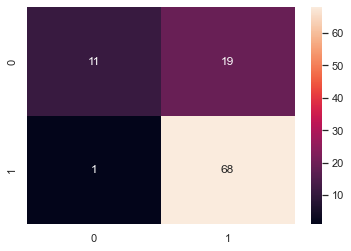

In [77]:
from sklearn.metrics import confusion_matrix
y_preds = grid.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

See above

<AxesSubplot:>

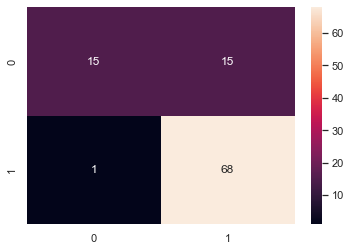

In [91]:


from sklearn.metrics import confusion_matrix
y_preds = best_model_1.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_preds)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [79]:
# pickle
from pathlib import Path
import pickle

filedir = Path('..')
filedir.mkdir(parents = True, exist_ok = True)

filepath = filedir / 'model.pickle'

with filepath.open('wb') as f:
    pickle.dump(best_model_1, f)


Test Request

In [80]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 1 to 613
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   amt_per_month             495 non-null    float64
 1   LoanAmount_log            495 non-null    float64
 2   combined_income_log       495 non-null    float64
 3   loan_to_income_ratio_log  495 non-null    float64
 4   Property_Area_Rural       495 non-null    uint8  
 5   Property_Area_Semiurban   495 non-null    uint8  
 6   Property_Area_Urban       495 non-null    uint8  
 7   Dependents_0              495 non-null    uint8  
 8   Dependents_1              495 non-null    uint8  
 9   Dependents_2              495 non-null    uint8  
 10  Dependents_3+             495 non-null    uint8  
 11  Loan_Amount_Term_180.0    495 non-null    uint8  
 12  Loan_Amount_Term_300.0    495 non-null    uint8  
 13  Loan_Amount_Term_360.0    495 non-null    uint8  
 14  Loan_Amoun

In [125]:
df_sample_request = X.loc[:5]

In [126]:
json_data = df_sample_request.to_json(orient='split')

In [127]:
import requests
URL = "http://18.223.16.241:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [128]:
print(r.json())

[1, 1, 1, 1, 1]
